In [94]:
@cuda.jit(device=True)
def julia(x, y, max_iters):
  i = 0
  c = complex(-0.8, 0.156)
  a = complex(x,y)
  for i in range(max_iters):
    a = a*a + c
    if (a.real*a.real + a.imag*a.imag) > 1000:
      return int((i/max_iters)*255)
  return 255

In [95]:
threadsperblock = 16
xblocks = (image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (image.shape[0] + (threadsperblock - 1)) // threadsperblock

In [96]:
@cuda.jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  x, y = cuda.grid(2)
    
  if x < width and y < height:
    real = min_x + x * pixel_size_x
    imag = min_y + y * pixel_size_y
    color = julia(real, imag, iters)
    image[y, x] = color

In [97]:
image = np.zeros((1000, 1000), dtype=np.uint8)
threadsperblock = 16
threads_per_block = (16, 16)
xblocks = (image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (image.shape[0] + (threadsperblock - 1)) // threadsperblock
blocks_per_grid = (xblocks, yblocks)

The slowest run took 106.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 3.29 ms per loop


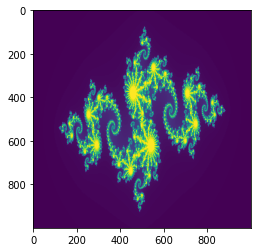

In [98]:
%timeit create_fractal[blocks_per_grid, threads_per_block](-2.0, 2.0, -1.0, 1.0, image, 200)
plt.imshow(image)
plt.viridis()
plt.show()

In [99]:
def julia(x, y, max_iters):
  i = 0
  c = complex(-0.8, 0.156)
  a = complex(x,y)
  for i in range(max_iters):
    a = a*a + c
    if (a.real*a.real + a.imag*a.imag) > 1000:
      return int((i/max_iters)*255)
  return 255

In [100]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = julia(real, imag, iters)
      image[y, x] = color

  return image

1 loop, best of 5: 9.52 s per loop


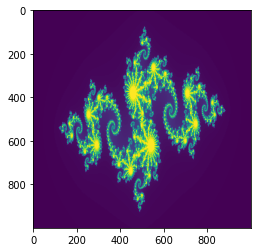

In [101]:
image = np.zeros((1000, 1000), dtype=np.uint8)
%timeit create_fractal(-2.0, 2.0, -1.0, 1.0, image, 200)
plt.imshow(image)
plt.viridis()
plt.show()